In [3]:
#### 1.loading_data.R 
### 1)Read cluster resaults
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
hclust.Res <- Cluster.20200201.V7.Tumor$hclust.Res
### 3)COAD_Aneuploidy_score_dataset
## Genomic_and_Functional_Approaches_to_Understanding_Cancer_Aneuploidy
file2 <- "/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/Genomic_and_Functional_Approaches_to_Understanding_Cancer_Aneuploidy/COAD_Aneuploidy_score_dataset.rds"
COAD_Aneuploidy_score_dataset <- readRDS(file2)


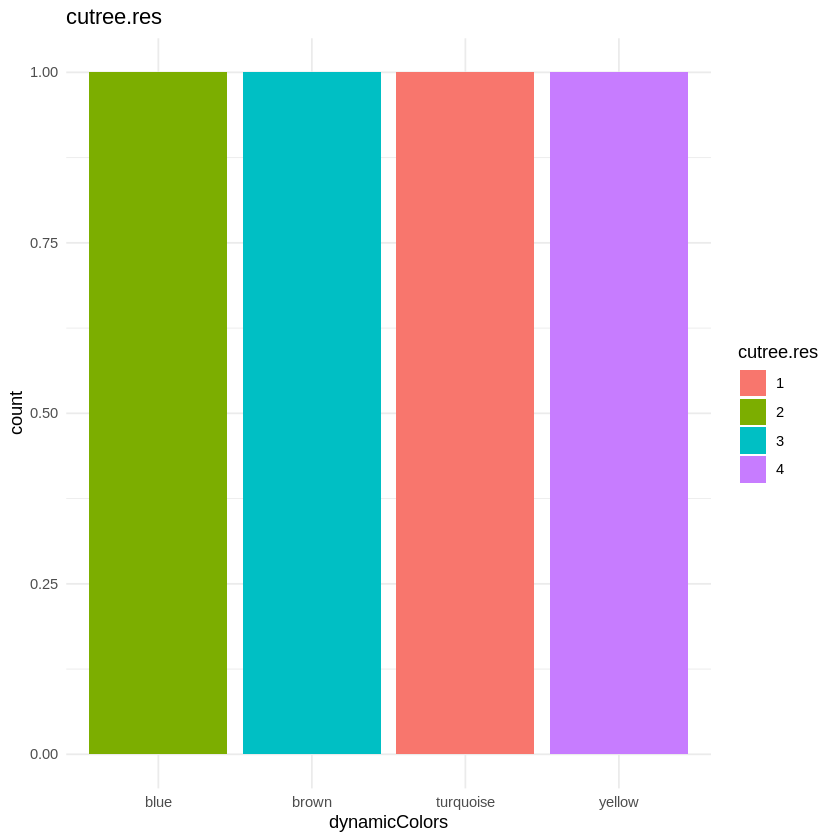

[1] "Some thing wrong with---rownames"


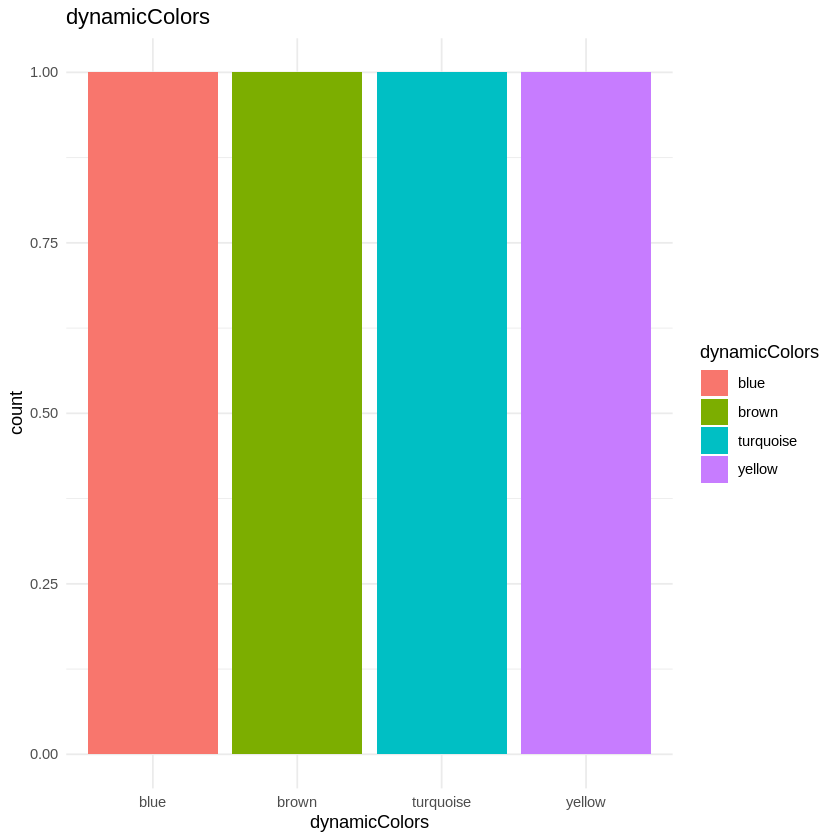

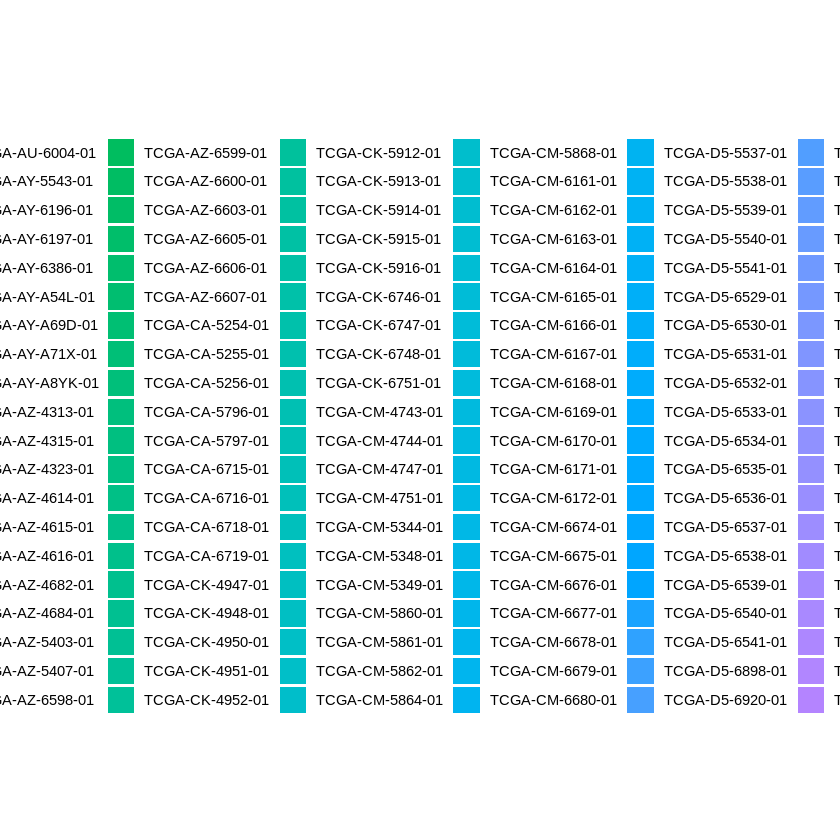

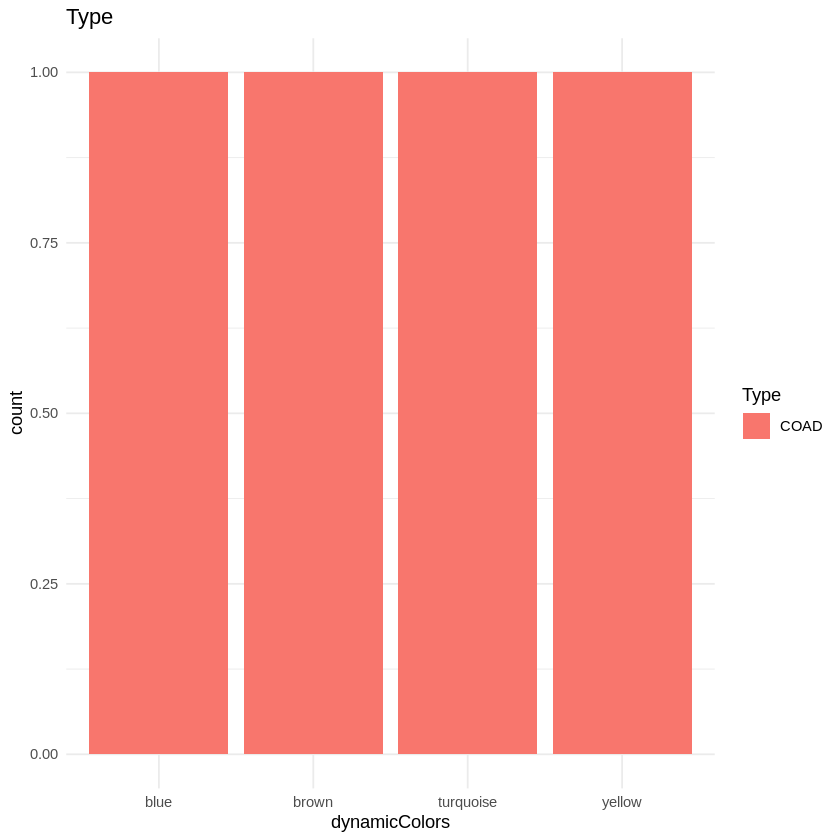

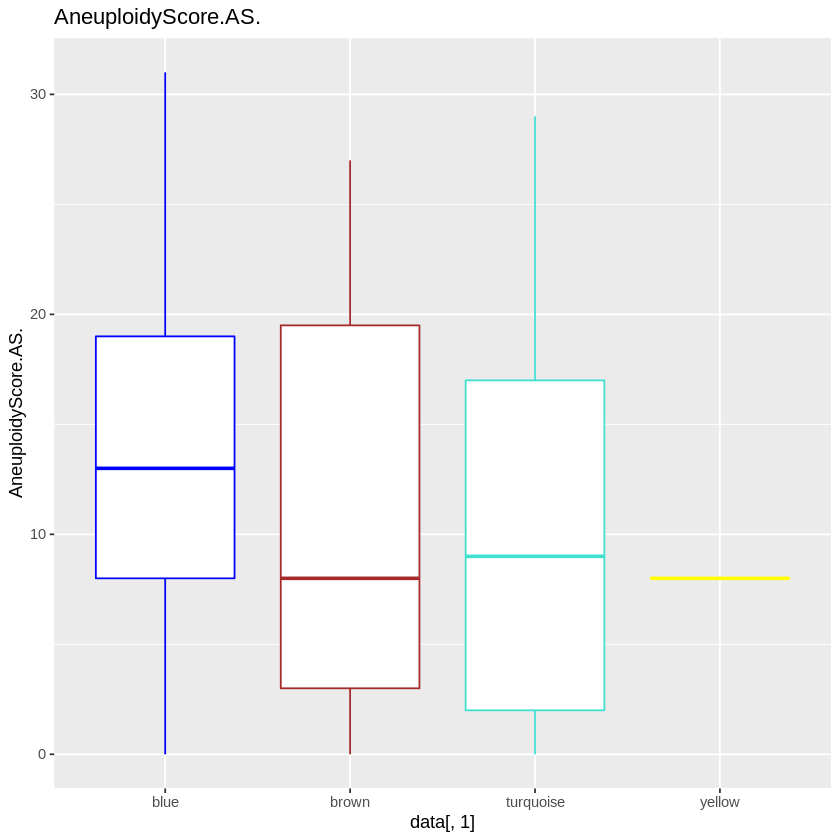

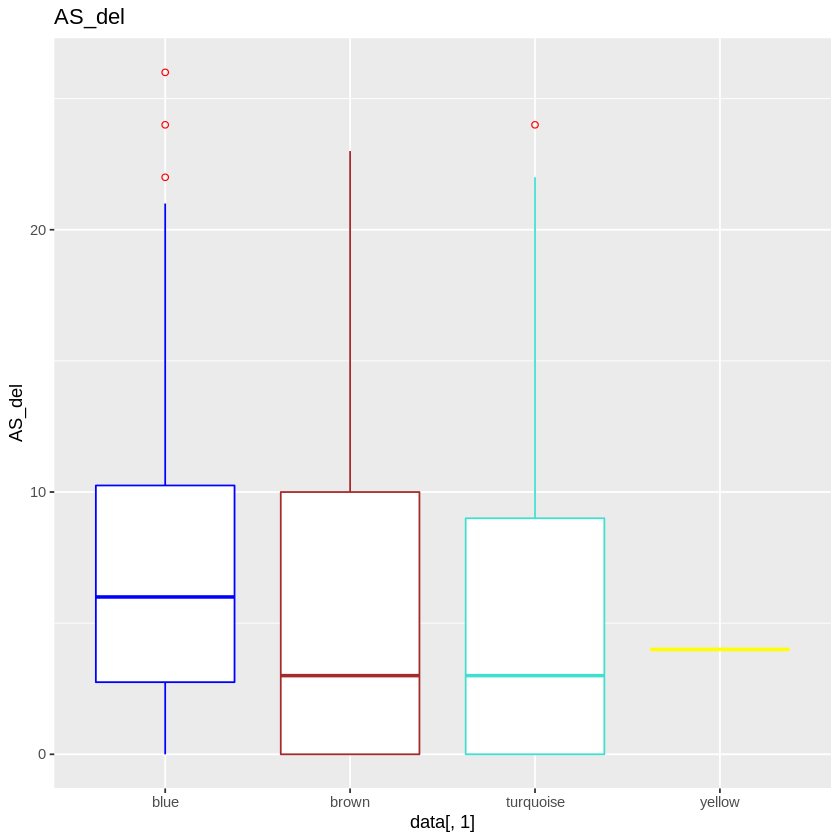

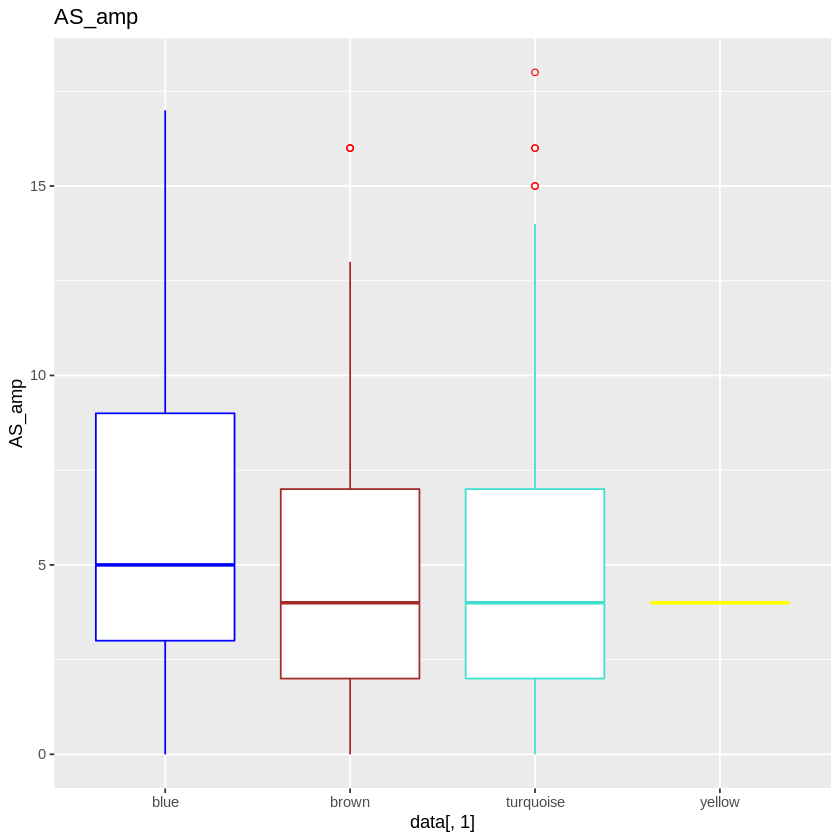

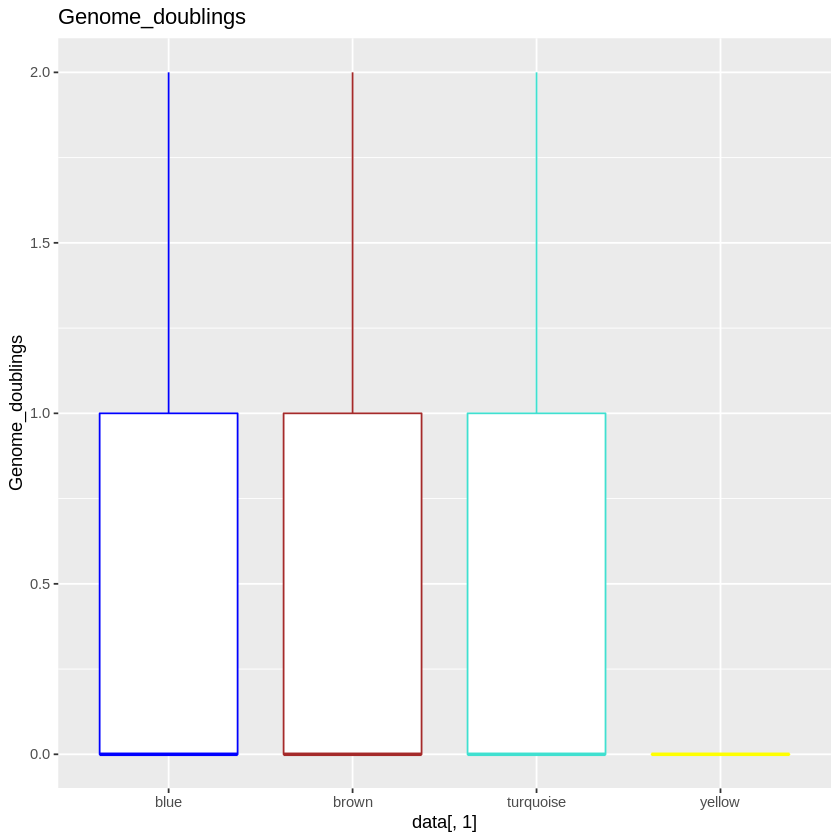

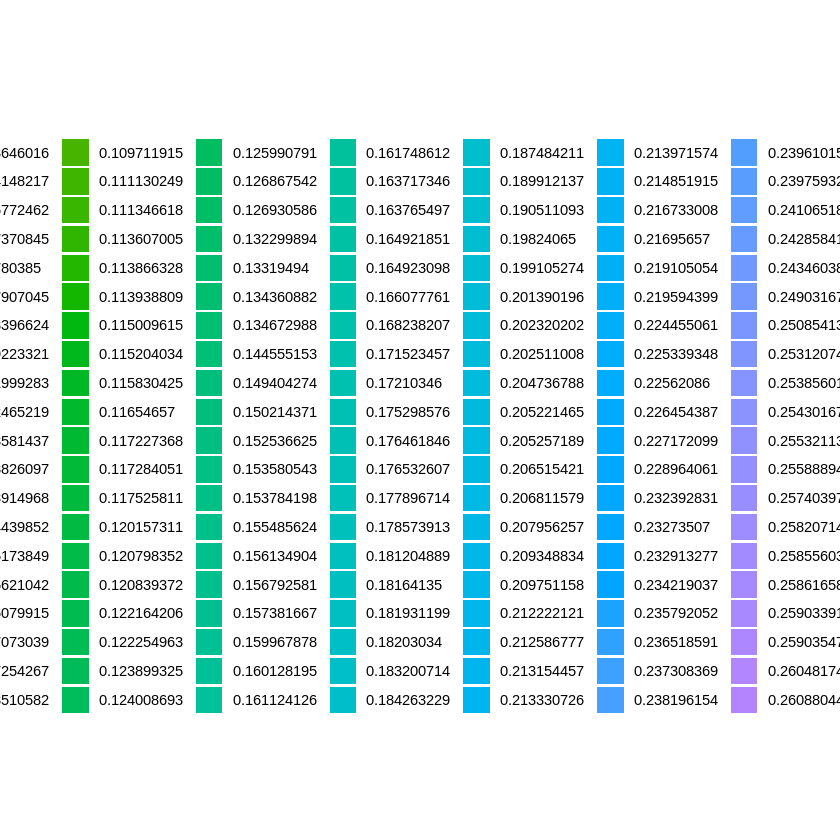

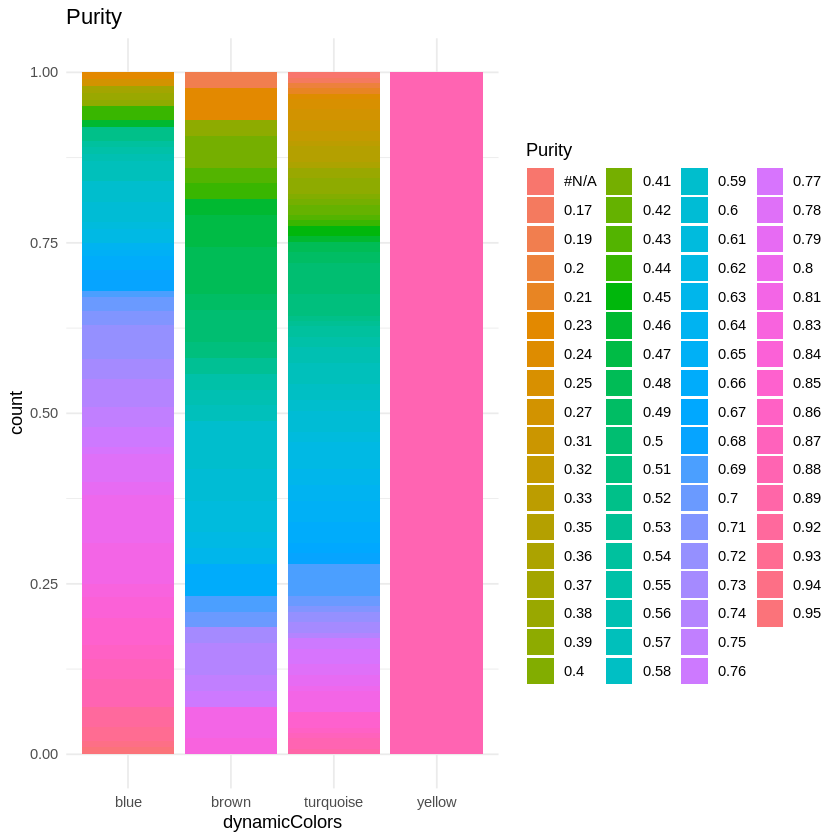

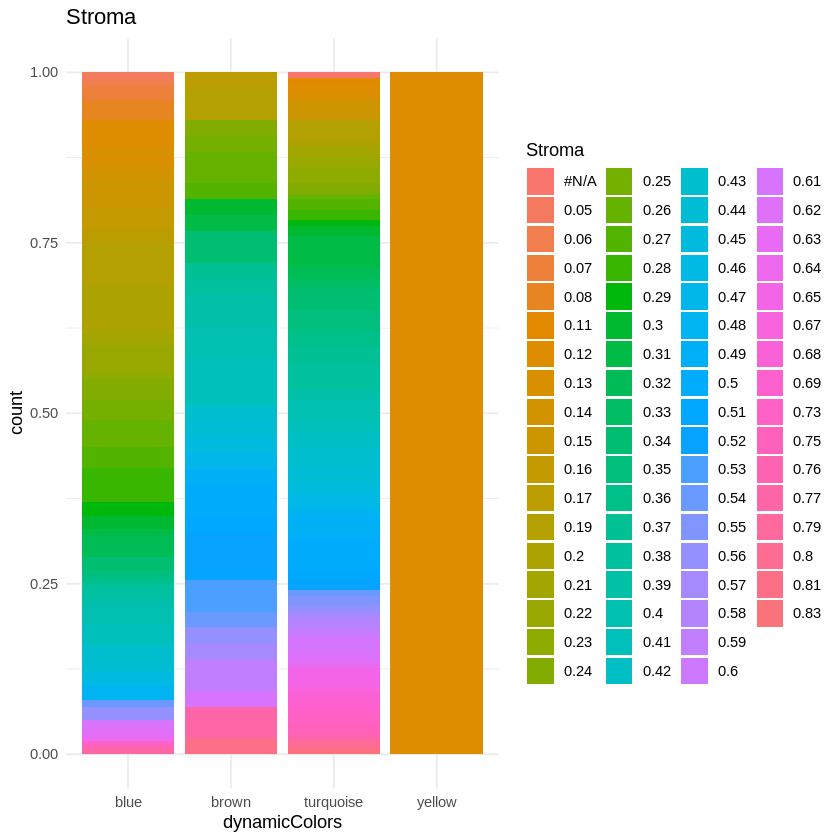

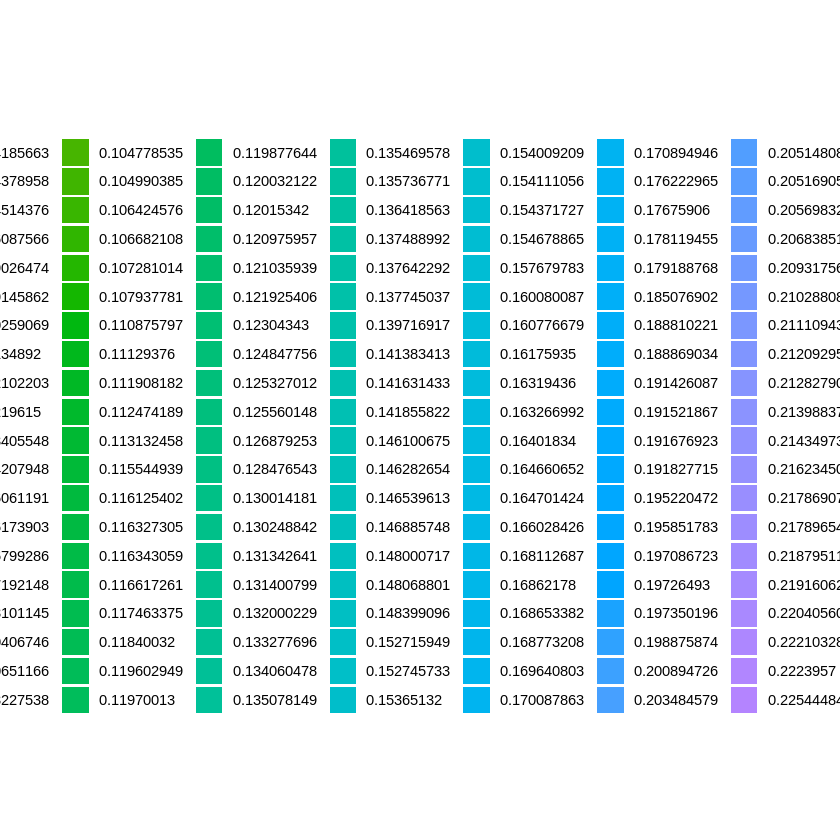

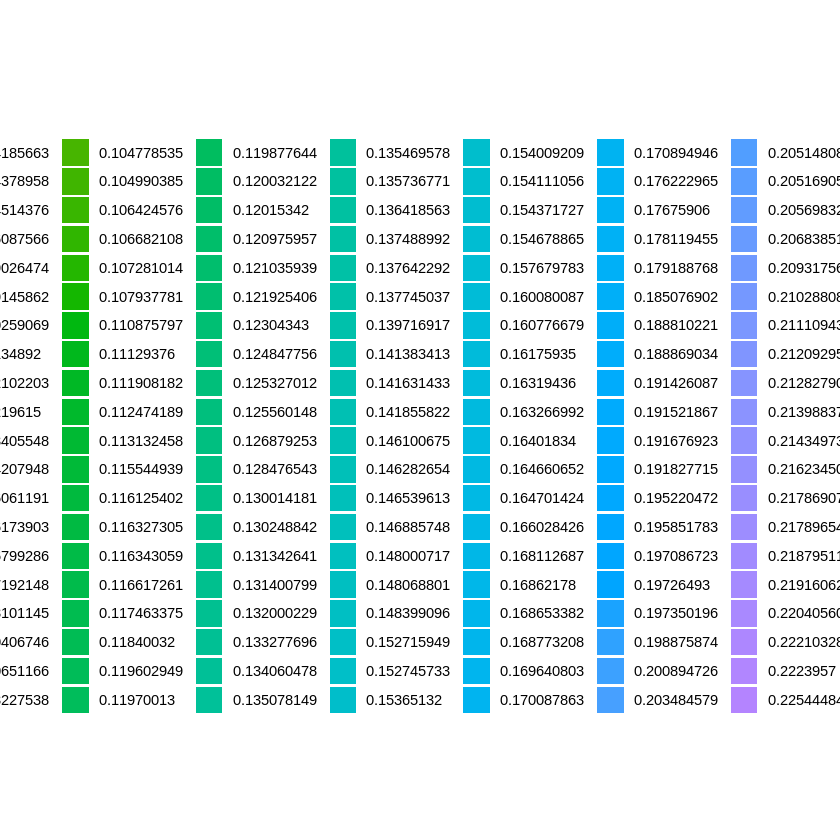

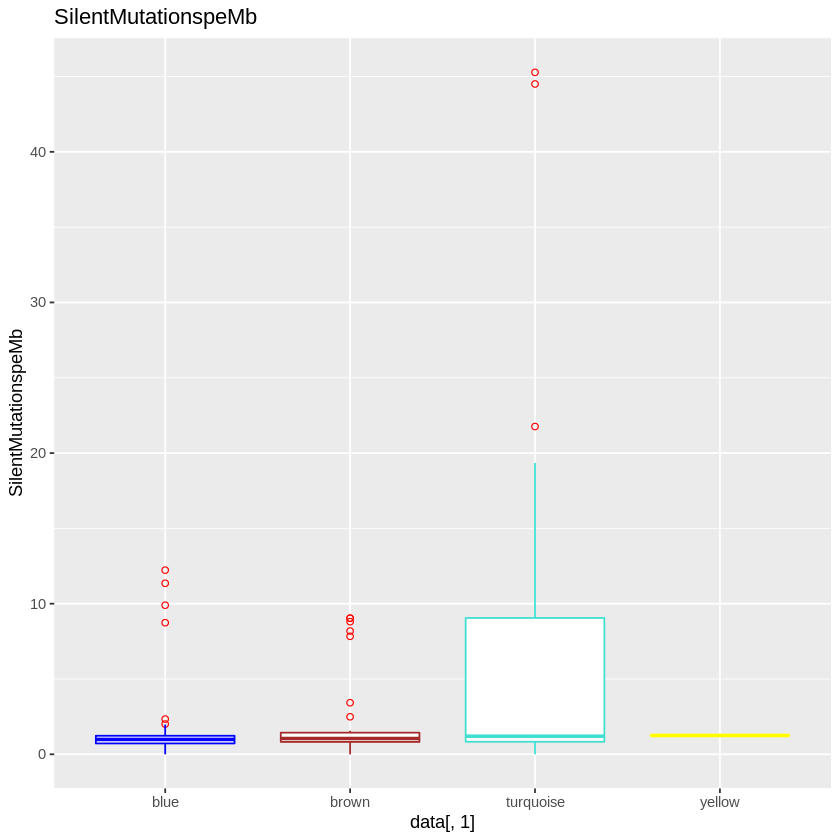

ERROR: Error: Aesthetics must be either length 1 or the same as the data (3): colour


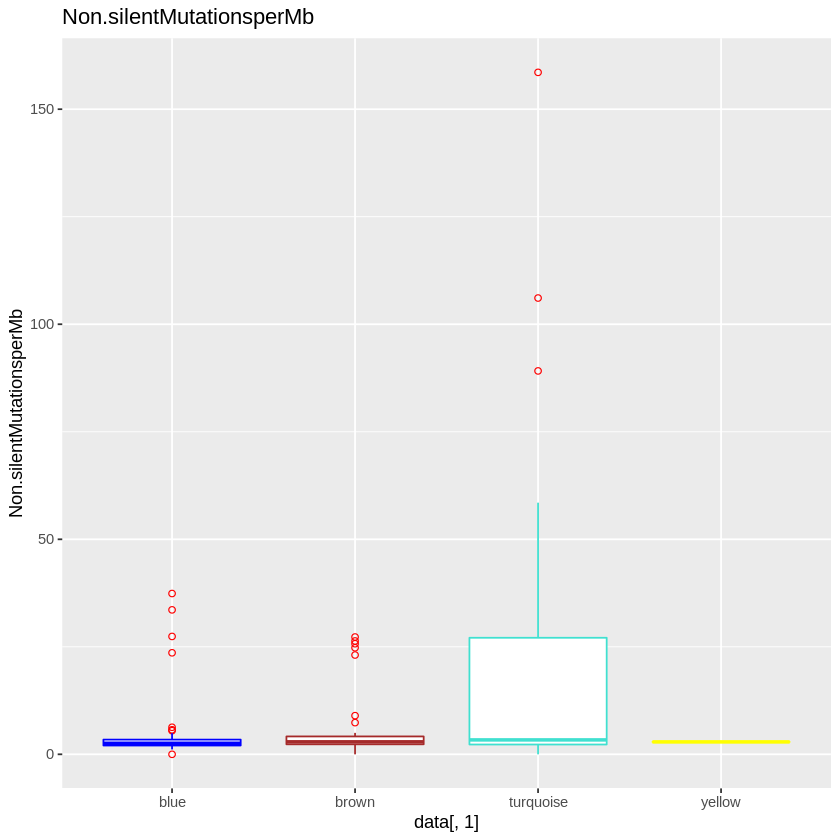

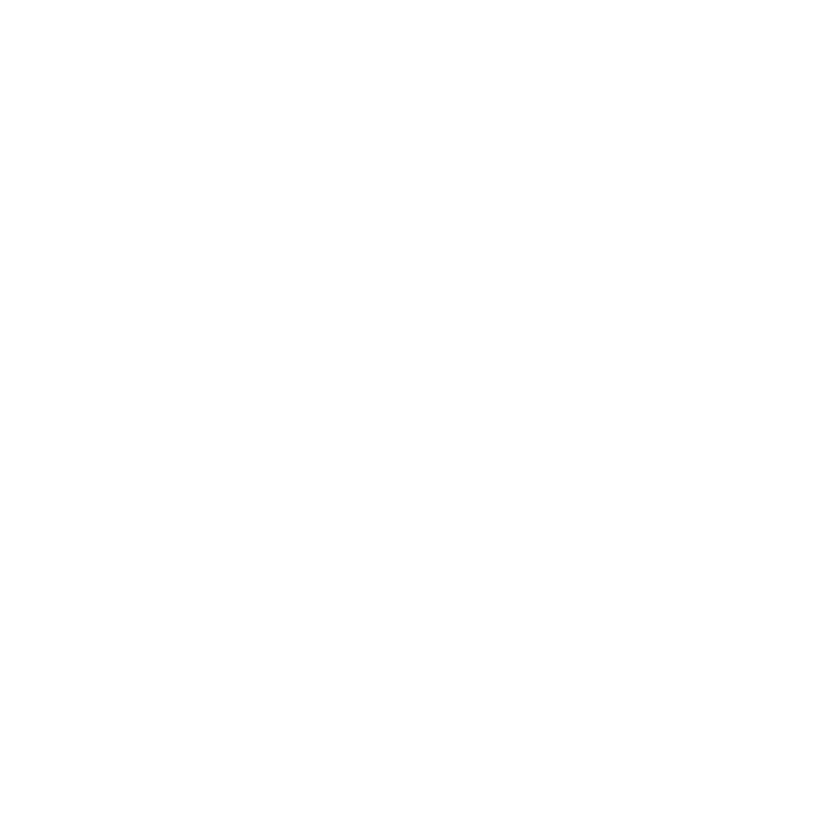

In [9]:
#### 3.GGplot_Aneuploidy_score.R
# Genomic and Functional Approaches to Understanding Cancer Aneuploidy
COAD.Aneuploidy.score <- COAD_Aneuploidy_score_dataset$COAD.Aneuploidy.score
### 1)Merge table
Plot.df <- dplyr::left_join(Cluster.df, COAD.Aneuploidy.score, by = "rownames")
#colnames(Plot.df)
library(ggplot2)
for(i in colnames(Plot.df)){
  Plot.df.sub <- Plot.df[,c("dynamicColors",i)]
  ##### 1.Discrete variable #####
  if (is.factor(Plot.df.sub[,i])) {
    ######## 1.Discrete variable
    # Remove NA value
    data=subset(Plot.df.sub, !is.na(Plot.df.sub[,i]))
    p <- ggplot(data, aes(x = dynamicColors, fill = data[,i])) + 
      geom_bar(position = "fill") + theme_minimal()+ scale_fill_discrete(name =i)+
      labs(title =i)
    print(p)
  } else if (is.numeric(Plot.df.sub[,i])) {
    ######## 2.Continuous variable
    # Remove NA value
    data=subset(Plot.df.sub, !is.na(Plot.df.sub[,i]))
    p2 <-ggplot(data,aes(x=data[,1], y=data[,2]),color=dynamicColors)  + 
      geom_boxplot(outlier.colour = "red",outlier.shape = 1,colour = c("blue","brown","turquoise","yellow")) + 
      labs(title =i, y = i)
    print(p2)
  }  else if (is.integer(Plot.df.sub[,i])) {
      ######## 2.Continuous variable
      # Remove NA value
      data=subset(Plot.df.sub, !is.na(Plot.df.sub[,i]))
      p2 <-ggplot(data,aes(x=data[,1], y=data[,2]))  + 
        geom_boxplot(outlier.colour = "red",outlier.shape = 1,colour = c("blue","brown","turquoise","yellow")) + 
        labs(title =i, y = i)
      print(p2)
  } else {
    #### 3.If something wrong
    print(paste0("Some thing wrong with---",i))
  } 
}